# Entregable Minería de datos y modelización predictiva

## Descripción del conjunto de datos 'penguins'
El conunto de datos 'penguins' de la libería 'seaborn' de Python contiene la siguiente información sobre diferentes especies de pingüinos:
- species: Es la especie de pingüino. Hay tres especies en el conjunto de
datos: ’Adelie’, ’Chinstrap’ y ’Gentoo’.
- island: Representa la isla donde se recopilaron los datos. Las islas son
’Biscoe’, ’Dream’ y ’Torgersen’.
- bill length mm: Longitud del pico en milímetros.
- bill depth mm: Profundidad del pico en milímetros.
- flipper length mm: Longitud de la aleta en milímetros.
- body mass g: Masa corporal del pingüino en gramos.
- sex: Género del pingüino, con las categorías ’Male’ (macho), ’Female’
(hembra) o ’NaN’ si la información no está disponible

Con el objetivo de reducir el número de variables numéricas y explorar relaciones entre las características físicas de los pingüinos, así como entre las especies, realizar los siguientes apartados:


**1. Calcular la matriz de correlaciones y su representación gráfica: ¿Cuáles
son las variables más correlacionadas entre las características físicas de los
pingüinos?**

In [305]:
# En primer lugar importamos las liberías necesarias y cargamos el dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from funciones_graficas import plot_pca_scatter_with_vectors, plot_pca_scatter, plot_contribuciones_proporcionales, plot_corr_cos, plot_cos2_bars, plot_cos2_heatmap
df = pd.read_excel('penguins.xlsx')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [306]:
# Para determinar la matriz de correlaciones entre las características físicas
# de los pingüinos sólo requerimos de las variables numéricas, así, eliminamos
# aquellas variables categóricas que no usaremos ahora mismo.

caracteristicas_fisicas_df = df.drop(columns = ['species', 'island', 'sex'], axis = 1)
caracteristicas_fisicas_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650


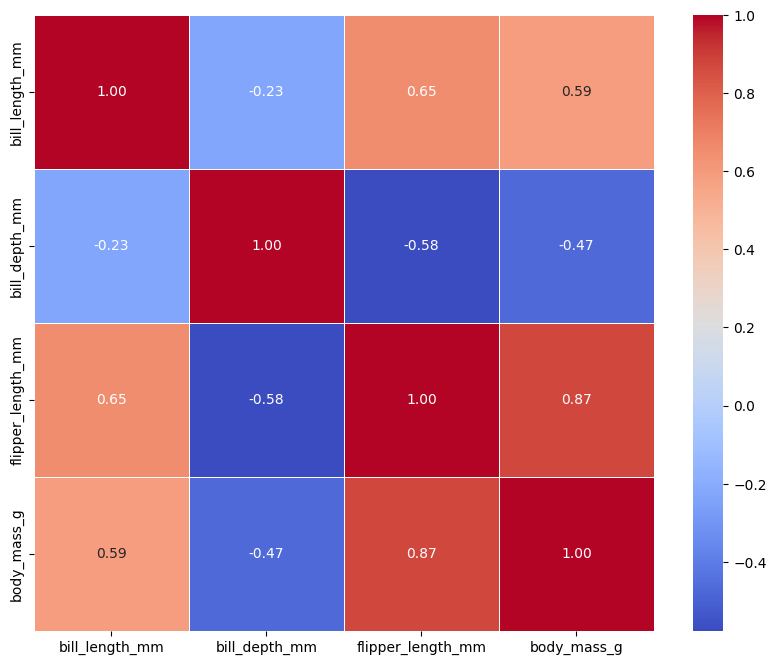

In [307]:
# Calculamos la matriz de correlaciones
R = caracteristicas_fisicas_df.corr()
R
# Representación gráfica de la matriz
plt.figure(figsize = (10,8))
sns.heatmap(R, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

Hay una relación positiva (+0.87) entre la masa y la longitud de las aletas. Seguida por la longitud de las aletas, una vez más, con la longitud del pico (+0.59). Por otro lado, hay una relación negativa (-0.58) entre la longitud de las aletas y la profundidad del pico.

**2. Realizar un análisis de componentes principales (PCA) sobre la matriz de correlaciones, calculando el número adecuado de componentes (máximo 4). Estudiar los valores de los autovalores obtenidos y las gráficas que los resumen. ¿Cúal es el número adecuado de componentes para representar eficientemente la variabilidad de las especies de pingüinos?**

In [308]:
# Para reliazar el análisis PCA primero debemos de estandarizar las variables
# Antes de inciar el análisis es conveniente realizar un análisis descriptivo
# de los datos, para observar anomalías.

variables = list(caracteristicas_fisicas_df.columns)

estadisticos = pd.DataFrame({
    'Mínimo': caracteristicas_fisicas_df[variables].min(),
    'Percentil 25': caracteristicas_fisicas_df[variables].quantile(0.25),
    'Mediana': caracteristicas_fisicas_df[variables].median(),
    'Percentil 75': caracteristicas_fisicas_df[variables].quantile(0.75),
    'Media': caracteristicas_fisicas_df[variables].mean(),
    'Máximo': caracteristicas_fisicas_df[variables].max(),
    'Desviación Estándar': caracteristicas_fisicas_df[variables].std(),
    'Varianza': caracteristicas_fisicas_df[variables].var(),
    'Datos Perdidos': caracteristicas_fisicas_df[variables].isna().sum() 
})

estadisticos

,Mínimo,Percentil 25,Mediana,Percentil 75,Media,Máximo,Desviación Estándar,Varianza,Datos Perdidos
bill_length_mm,32.1,39.5,44.5,48.6,43.992793,59.6,5.468668,29.906333,0
bill_depth_mm,13.1,15.6,17.3,18.7,17.164865,21.5,1.969235,3.877888,0
flipper_length_mm,172.0,190.0,197.0,213.0,200.966967,231.0,14.015765,196.441677,0
body_mass_g,2700.0,3550.0,4050.0,4775.0,4207.057057,6300.0,805.215802,648372.487699,0


In [309]:
# Los datos no muestran ninguna anomalía aparente
# Analizmos ahhora las relaciones entre las variables, ya que si muestran una
# fuerte indepencencia no tendría sentido realizar un PCA. Calculamos matrices
# de covariances y correlaciones

C = caracteristicas_fisicas_df.cov()
C

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [310]:
R # Enseñamos la matriz de correlaciones una vez mas

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [311]:
caracteristicas_estadarizadas = pd.DataFrame(
    StandardScaler().fit_transform(caracteristicas_fisicas_df),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables], 
    index=caracteristicas_fisicas_df.index)

# Aplicamos la sentencia PCA, primero para todas las componentes posibles (4)
# Usamos .fit(caracteristicas_estandarizadas) para ajustar el modelo de PCA a 
# los datos estandarizados.

fit = PCA(n_components= 4).fit(caracteristicas_estadarizadas)

# Calculamos los autovalores asociados a las componentes principales

autovalores = fit.explained_variance_

#Obtenemos los autovectores asociados a cada componente

autovectores = pd.DataFrame(PCA(n_components= 4).fit(caracteristicas_estadarizadas).components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in variables])

resultados_pca = pd.DataFrame(fit.transform(caracteristicas_estadarizadas), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=caracteristicas_estadarizadas.index)
resultados_pca.head()

# Hemos desarrollado el PCA completo con todas las posibles componentes,
# sin embargo, esto no es óptimo ni eficiente, de forma que es necesario reducir
# la dimensionalidad. Para ello vamos a decidir con cuántas CP nos quedamos. 
# Par ello, procedemos a calcular la varianza explicada y el gráfico del 'Codo'

,Componente 1,Componente 2,Componente 3,Componente 4
0,-1.853593,0.032069,-0.234902,-0.528397
1,-1.316254,-0.443527,-0.027470,-0.401727
2,-1.376605,-0.161230,0.189689,0.528662
3,-1.885288,-0.012351,-0.628873,0.472893
4,-1.919981,0.817598,-0.701051,0.196416


In [312]:
var_explicada = fit.explained_variance_ratio_*100
var_acumulada = np.cumsum(var_explicada)

data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)]) 

# Imprimir la tabla
tabla

,Autovalores,Variabilidad Explicada,Variabilidad Acumulada
Componente 1,2.753625,68.633893,68.633893
Componente 2,0.780461,19.452929,88.086822
Componente 3,0.369753,9.216063,97.302885
Componente 4,0.108210,2.697115,100.000000


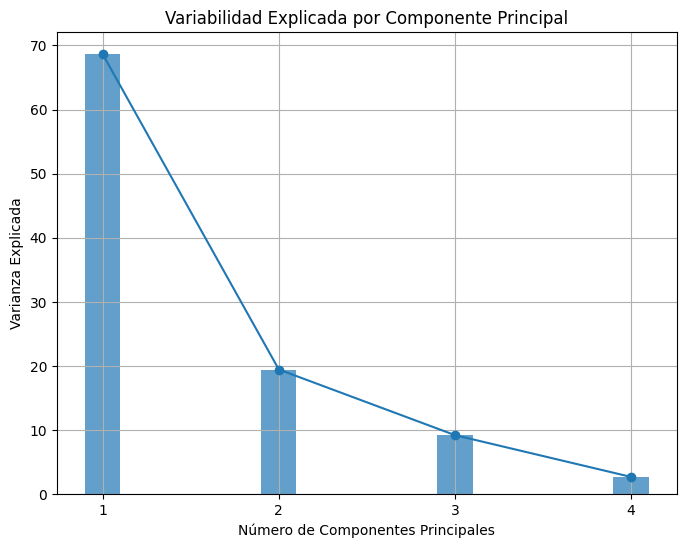

In [313]:
# Se observa que con las dos primeras componentes conseguimos explicar el 88% 
# de la variabilidad total. Si bien es cierto que añadiendo una tercera componente
# conseguimos cubrir casi toda la variabilidad, se puede considerar que no es necesaria
# para fundamentar esta decisión realizamos el gráfico del 'codo'

def plot_varianza_explicada(var_explicada, n_components):
    """
    Representa la variabilidad explicada por cada componente principal
    Args:
      var_explicada (array): Un array que contiene el porcentaje de varianza explicada
        por cada componente principal. Generalmente calculado como
        var_explicada = fit.explained_variance_ratio_ * 100.
      n_components (int): El número total de componentes principales.
        Generalmente calculado como fit.n_components.
    """  
    # Crear un rango de números de componentes principales de 1 a n_components
    num_componentes_range = np.arange(1, n_components + 1)

    # Crear una figura de tamaño 8x6
    plt.figure(figsize=(8, 6))

    # Trazar la varianza explicada en función del número de componentes principales
    plt.plot(num_componentes_range, var_explicada, marker='o')

    # Etiquetas de los ejes x e y
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Varianza Explicada')

    # Título del gráfico
    plt.title('Variabilidad Explicada por Componente Principal')

    # Establecer las marcas en el eje x para que coincidan con el número de componentes
    plt.xticks(num_componentes_range)

    # Mostrar una cuadrícula en el gráfico
    plt.grid(True)

    # Agregar barras debajo de cada punto para representar el porcentaje de variabilidad explicada
    # - 'width': Ancho de las barras de la barra. En este caso, se establece en 0.2 unidades.
    # - 'align': Alineación de las barras con respecto a los puntos en el eje x. 
    #   'center' significa que las barras estarán centradas debajo de los puntos.
    # - 'alpha': Transparencia de las barras. Un valor de 0.7 significa que las barras son 70% transparentes.
    plt.bar(num_componentes_range, var_explicada, width=0.2, align='center', alpha=0.7)

    # Mostrar el gráfico
    plt.show()
    
plot_varianza_explicada(var_explicada, fit.n_components_)

In [314]:
# La variabilidad se estabiliza a partir de la tercerca, luego mantenemos nuestra
# decisión anterior de sólo usar dos componentes principales. Ahora procderemos
# a calcularlas. Para ello necesitamos conocer la matriz de transformación formada
# por los autovectores o vectores propios asociados a los autovalores seleccionados.


fit = PCA(n_components= 2).fit(caracteristicas_estadarizadas)
autovalores = fit.explained_variance_
print(autovalores)
autovectores = pd.DataFrame(PCA(n_components= 2).fit(caracteristicas_estadarizadas).components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in variables])
autovectores

[2.75362487 0.7804609 ]


,Autovector 1,Autovector 2
bill_length_mm_z,0.453753,0.600195
bill_depth_mm_z,-0.399047,0.796170
flipper_length_mm_z,0.576825,0.005788
body_mass_g_z,0.549675,0.076464


La variabilidad se estabiliza a partir de la tercera, luego mantenemos nuestra decisión inicial de sólo utilizar dos componentes principales. Con los dos primeros autovalores conseguimos explicar el 88% de variabiliad total. La primera componente captura alrededor de un 70% de la variabilidad total, mientras que la segunda alrededor del 20%.  

**3. Realizar nuevamente el análisis de componentes principales sobre la matriz de correlaciones, esta vez indicando el número de componentes principales que hemos decidido retener. Sobre este análisis, contestar los siguientes apartados:**

**3.1 Escribe numéricamente el proceso para el cálculo de la primera observación en la primera componente.**

In [315]:
caracteristicas_estadarizadas.iloc[0,:]

bill_length_mm_z      -0.896042
bill_depth_mm_z        0.780732
flipper_length_mm_z   -1.426752
body_mass_g_z         -0.568475
Name: 0, dtype: float64

Con los datos ya tipificados $Z$ y nuestra matriz de transformación $W$ podemos calcular las componentes principales $CP$ tales que $CP = ZW$, es decir

$$ CP_1 = 0.454 \times\text{bill\_lenght\_mm}_\text{z}-0.399 \times\text{bill\_depth\_mm}_\text{z}+0.577 \times\text{flipper\_lenght\_mm}_\text{z}+0.550 \times\text{body\_mass\_g}_\text{z}$$

Para la primera componente de la primera observación tenemos entonces 

$$ CP_{11} = 0.454 \times (-0.896042)-0.399 \times 0.781+0.577 \times(-1.423)+0.550 \times (-0.569) = -1.853$$

**3.2 Comentar los gráficos que representan las variables en los planos formados por las componentes: Intenta explicar lo que representa cada componente en términos de las características físicas de los pingüinos**

In [316]:
# Estudiamos como de fuerte o débil es la relación entre las componentes
# princpales y cada una de las variables originales. Para ello calcuamos
# la relación entre variables y componentes


resultados_pca = pd.DataFrame(fit.transform(caracteristicas_estadarizadas), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=caracteristicas_estadarizadas.index)

# Añadimos las componentes principales a la base de datos estandarizada.
caracteristicas_estadarizadas = pd.concat([caracteristicas_estadarizadas, resultados_pca], axis=1)
covarianzas_var_comp = caracteristicas_estadarizadas.cov()
covarianzas_var_comp = covarianzas_var_comp.iloc[:fit.n_features_in_, fit.n_features_in_:]
print(covarianzas_var_comp)


                     Componente 1  Componente 2
bill_length_mm_z         1.249466      0.468429
bill_depth_mm_z         -1.098826      0.621379
flipper_length_mm_z      1.588360      0.004517
body_mass_g_z            1.513598      0.059677


In [317]:
correlaciones_var_comp = caracteristicas_estadarizadas.corr()
correlaciones_var_comp = correlaciones_var_comp.iloc[:fit.n_features_in_, fit.n_features_in_:]
print(correlaciones_var_comp)

                     Componente 1  Componente 2
bill_length_mm_z         0.751829      0.529438
bill_depth_mm_z         -0.661186      0.702309
flipper_length_mm_z      0.955748      0.005106
body_mass_g_z            0.910762      0.067449


La primera componente principal $CP_1$ muestra una correlación negativa con la profundidad del pico, mientras que muestra una fuerte correlación positiva con el tamaño de las aletas y la masa del pingüino. La segunda componente, por otro lado, muestra muy poca correlación con las aletas y con el paeso, mientras que muestra una fuerte relación positiva con la profundidad del pico. Es interesante observar que el tamaño del pico está correlacionada con ambas componentes principales, lo que sugiera una influencia mixta de ambas $CP_1$ y $CP_2$

$CP_1$ parece estar altamente correlacionada con el tamaño del pingüino (masa corporal y longitud de la aleta), mientras que $PC_2$ captura las diferencias en la forma del pico (longitud vs profunidad). Veamos los gráficos para justificar esta hipótesis.

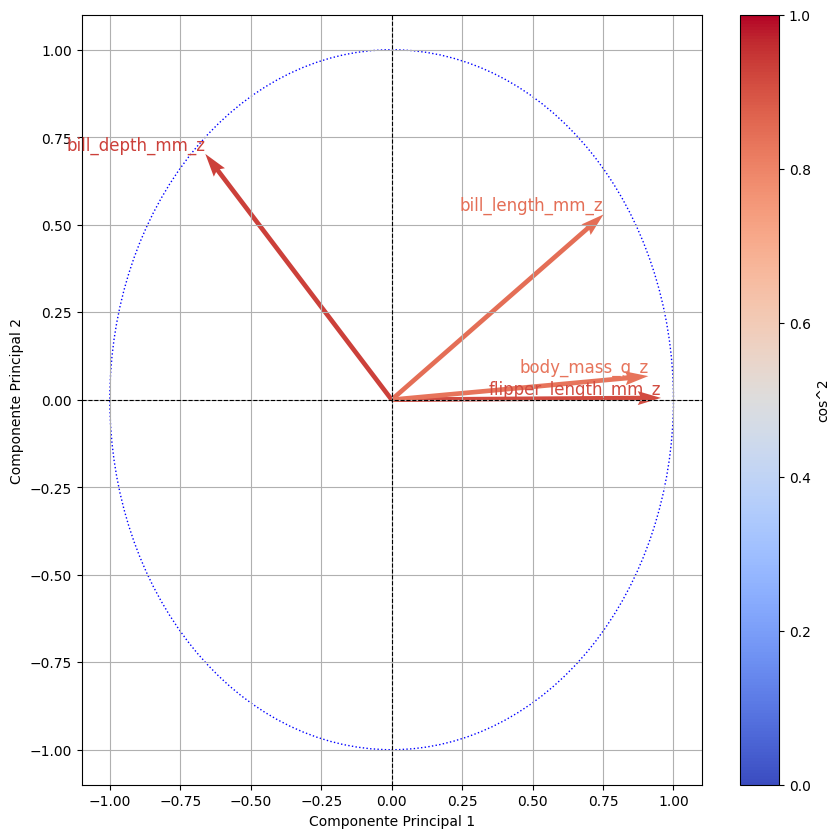

In [318]:
cos2 = correlaciones_var_comp**2
pca = PCA(n_components= 2)
fit = pca.fit(caracteristicas_estadarizadas)
plot_corr_cos(fit.n_components_, correlaciones_var_comp)

En este último gráfico podemos observar que el tamaño de los pingüinos viene explicado casi en su mayor parte por la primera componente principal, mientras que la forma del pico - su profundidad - viene explicada por la segunda componente. Es de remarcar que la longitud viene explicada por ambas, esto se debe a que es de esperar que pingüinos de mayor tamaño también presenten un pico más largo. 

La variable de color más rojo es la profundidad, indicando que es la variable mejor explicada por cualquiera de las componentes

**3.3 Sobre los gráficos que representan las observaciones en los nuevos ejes: Teniendo en cuenta la posición de las especies de pingüinos en el gráfico, ¿cuáles destacan más en cada componente?**

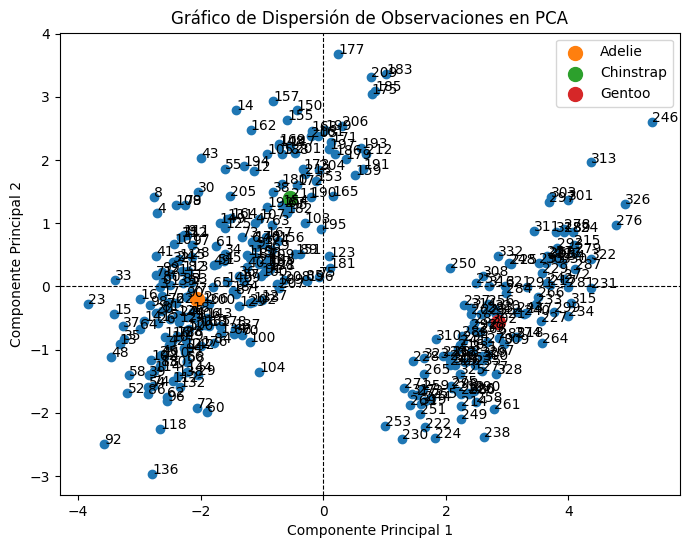

In [319]:
## Primero debemos añadir una nueva variable categórica al PCA
## ya realizado. Debemos representar los centroides de la variable 
## 'especie'. Estos centroides actúan como puntos de referencia que 
## resumen la tedencia centrar de cada categoría en el espacio de las CP

species = df['species']
species.index = df.index
caracteristicas_estadarizadas_especies = pd.concat([caracteristicas_estadarizadas, species], axis = 1)

componentes_principales_sup = pca.transform(caracteristicas_estadarizadas)

def plot_pca_scatter_with_categories(datos_componentes_sup_var, componentes_principales_sup, n_components, var_categ):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados con categorías.

    Args:
        datos_componentes_sup_var (pd.DataFrame): DataFrame que contiene las categorías.
        componentes_principales_sup (np.ndarray): Matriz de componentes principales.
        n_components (int): Número de componentes principales seleccionadas.
        var_categ (str): Nombre de la variable introducida
    """
    # Obtener las categorías únicas
    categorias = datos_componentes_sup_var[var_categ].unique()

    # Iterar sobre todos los posibles pares de componentes principales
    for i in range(n_components):
        for j in range(i + 1, n_components):
            # Crear un gráfico de dispersión de las observaciones en las dos primeras componentes principales
            plt.figure(figsize=(8, 6))
            plt.scatter(componentes_principales_sup[:, i], componentes_principales_sup[:, j])

            for categoria in categorias:
                # Filtrar las observaciones por categoría
                observaciones_categoria = componentes_principales_sup[datos_componentes_sup_var[var_categ] == categoria]
                # Calcular el centroide de la categoría
                centroide = np.mean(observaciones_categoria, axis=0)
                plt.scatter(centroide[i], centroide[j], label=categoria, s=100, marker='o')

            # Añadir etiquetas a las observaciones
            etiquetas_de_observaciones = list(datos_componentes_sup_var.index)

            for k, label in enumerate(etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales_sup[k, i], componentes_principales_sup[k, j]))

            # Dibujar líneas discontinuas que representen los ejes
            plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

            # Etiquetar los ejes
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')

            # Establecer el título del gráfico
            plt.title('Gráfico de Dispersión de Observaciones en PCA')

            # Mostrar la leyenda para las categorías
            plt.legend()
            plt.show()

plot_pca_scatter_with_categories(caracteristicas_estadarizadas_especies, componentes_principales_sup, fit.n_components, 'species')



También podemos verlo sin recurrir a los centroides, lo que en este caso parece dar más luz a las diferentes características de cada especie. 

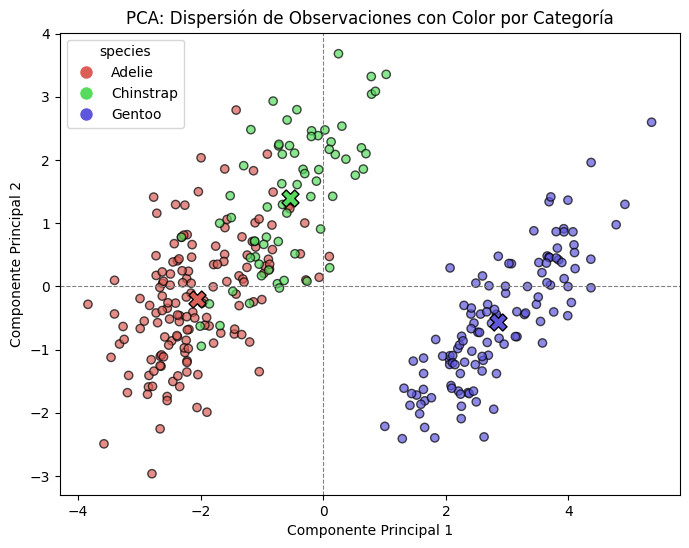

In [320]:
def plot_pca_scatter_with_categories(datos_componentes_sup_var, componentes_principales_sup, n_components, var_categ):
    """
    Genera gráficos de dispersión de observaciones en pares de componentes principales seleccionados con colores por categorías.

    Args:
        datos_componentes_sup_var (pd.DataFrame): DataFrame que contiene las categorías.
        componentes_principales_sup (np.ndarray): Matriz de componentes principales.
        n_components (int): Número de componentes principales seleccionadas.
        var_categ (str): Nombre de la variable categórica.
    """
    # Obtener las categorías únicas y asignar colores
    categorias = datos_componentes_sup_var[var_categ].unique()
    colores = sns.color_palette("hls", len(categorias))  # Paleta de colores

    # Crear un diccionario para asignar un color único a cada categoría
    colores_dict = {categoria: colores[i] for i, categoria in enumerate(categorias)}

    # Obtener los colores de cada observación en el orden del dataframe
    colores_asignados = [colores_dict[categoria] for categoria in datos_componentes_sup_var[var_categ]]

    # Iterar sobre todos los pares posibles de componentes principales
    for i in range(n_components):
        for j in range(i + 1, n_components):
            plt.figure(figsize=(8, 6))
            
            # Graficar los puntos coloreados por categoría
            scatter = plt.scatter(componentes_principales_sup[:, i], 
                                  componentes_principales_sup[:, j], 
                                  c=colores_asignados, alpha=0.7, edgecolors='k')

            # Agregar centroides por categoría
            for categoria in categorias:
                # Filtrar observaciones por categoría
                observaciones_categoria = componentes_principales_sup[
                    datos_componentes_sup_var[var_categ] == categoria
                ]
                # Calcular el centroide
                centroide = np.mean(observaciones_categoria, axis=0)
                plt.scatter(centroide[i], centroide[j], 
                            color=colores_dict[categoria], 
                            label=f'Cent. {categoria}', 
                            s=150, marker='X', edgecolors='black')

            # Dibujar líneas de referencia en el centro
            plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
            plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

            # Etiquetas de ejes y título
            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')
            plt.title('PCA: Dispersión de Observaciones con Color por Categoría')

            # Crear una leyenda personalizada con los colores de las categorías
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores_dict[categoria], markersize=10, label=categoria) for categoria in categorias]
            plt.legend(handles=handles, title=var_categ)

            # Mostrar el gráfico
            plt.show()

# Llamar la función con tus datos
plot_pca_scatter_with_categories(caracteristicas_estadarizadas_especies, componentes_principales_sup, fit.n_components, 'species')


Los pingüinos Gentoo (azul) están claramente separados hacia la derecha en el gráfico, lo que indica que tienen valores más altos en la primera componente principal. Esta componente está fuertemente relacionada con el tamaño corporal (masa y longitud de aletas), esto sugiere que los pingüinos Gentoo son los más grandes de las tres especies.

Los pingüinos Adelie (rojo) y Chinstrap (verde) están distribuidos más hacia la izquierda, lo que indica que son más pequeños en comparación con los Gentoo.

Como la segunda componente principal está relacionada con la profundidad del pico, podemos observar que los pingüinos Chinstrap (verde) tienden a tener valores más altos en esta dimensión en comparación con los Adelie (rojo), lo que sugiere que podrían tener un pico más profundo.

Los pingüinos Gentoo (azul) están más agrupados en la parte baja de esta dimensión, lo que indica que tienen picos menos profundos en comparación con las otras especies.

Aunque hay cierta separación entre Adelie y Chinstrap, sí existe algo de solapamiento en sus distribuciones, especialmente en los valores intermedios de la primera componente. Esto sugiere que, aunque los Chinstrap suelen ser algo más grandes que los Adelie, en algunos casos tienen tamaños similares.

**3.4 Comenta Relación entre las Componentes Principales y las Variables, las contribuciones de las Componentes Principales a la Variabilidad Explicada de las Variables Originales y la contribución de las Variables a las Componentes Principales.**

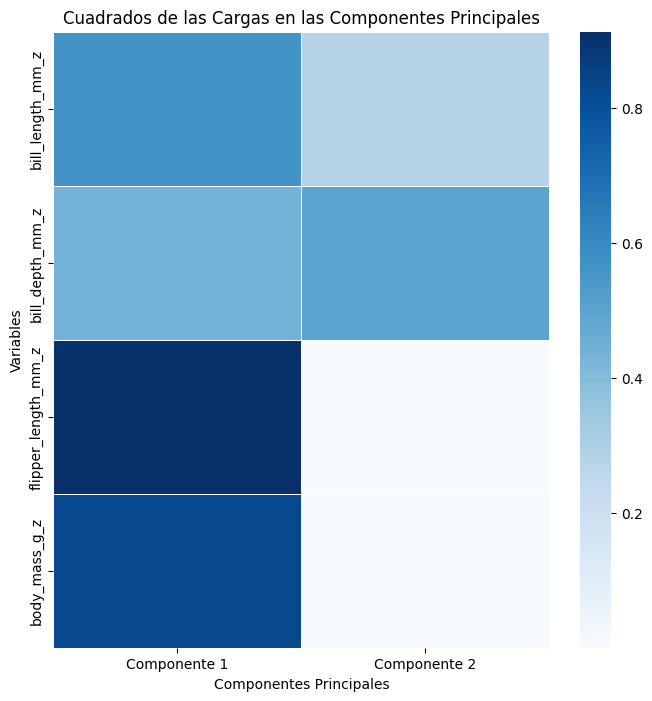

In [321]:
plot_cos2_heatmap(cos2)

Se observa que flipper_length_mm_z y body_mass_g_z están principalmente explicados por la Componente 1 (tamaño general del pingüino). Mientras bill_depth_mm_z tiene una representación fuerte en la Componente 2 (profundidad del pico). Por otro lado, bill_length_mm_z tiene cargas significativas en ambas componentes, lo que indica que contribuye tanto al tamaño general como a la forma del pico. 

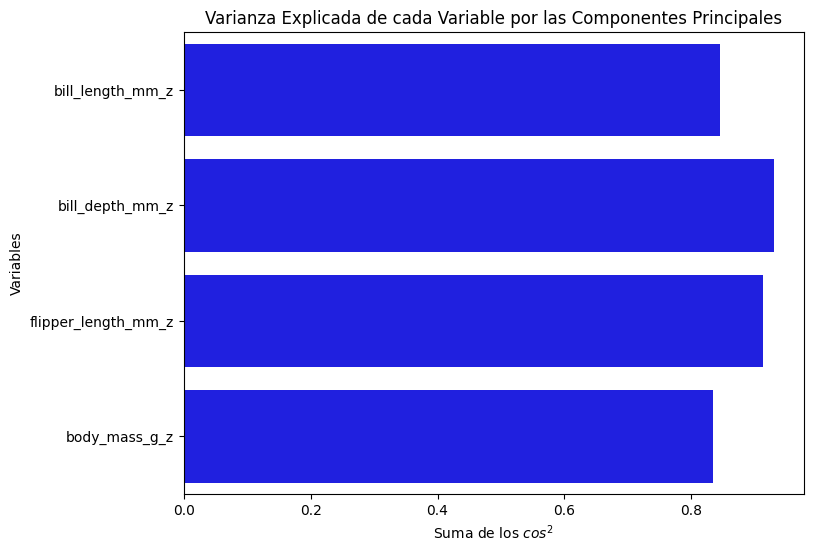

In [322]:
plot_cos2_bars(cos2)

bill_length_mm_z, bill_depth_mm_z, flipper_length_mm_z y body_mass_g_z tienen valores altos, lo que sugiere que la mayor parte de su variabilidad está capturada en las primeras dos componentes principales. Esto confirma que la PCA logra reducir la dimensionalidad del problema sin perder demasiada información.

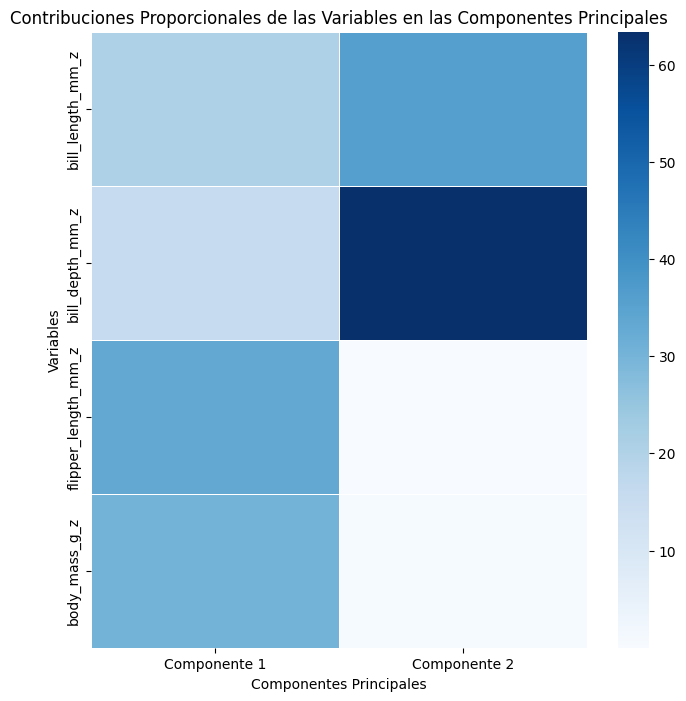

,Componente 1,Componente 2
bill_length_mm_z,20.589194,36.023392
bill_depth_mm_z,15.923869,63.388588
flipper_length_mm_z,33.272708,0.003350
body_mass_g_z,30.214229,0.584669


In [323]:
plot_contribuciones_proporcionales(cos2,autovalores,fit.n_components)

El tercer gráfico muestra cómo cada variable contribuye a la formación de cada componente. 
- Componente 1: Es dominada por flipper_length_mm_z y body_mass_g_z, indicando que representa el tamaño general del pingüino.
- Componente 2: Está principalmente determinada por bill_depth_mm_z, lo que confirma que esta componente está capturando las diferencias en la forma del pico.

**Tras explotar las características físicas de los pingüinos mediante Análisis de Componentes Principales (ACP), ahora nos centraremos en evaluar la estructura de los grupos o clústeres existentes en el conjunto de datos. Utilizarremos técnias de análisis clúster, tanto jerárquicas como no jerárquicas, para identificar posibles agrupaciones basadas en las características (numéricas) de los pingüinos. Los siguientes son los pasos y tareas a realizar:**

In [324]:
## Primeero importamos las liberías que necesitamos para este segundo apartado.

from scipy.spatial import distance
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


**1. Calcular la Matriz de Distancias: Inicialmente, calcular la matriz de distancias entre las observaciones, empleando una medida de distancia adecuada, como la distancia euclídea.**

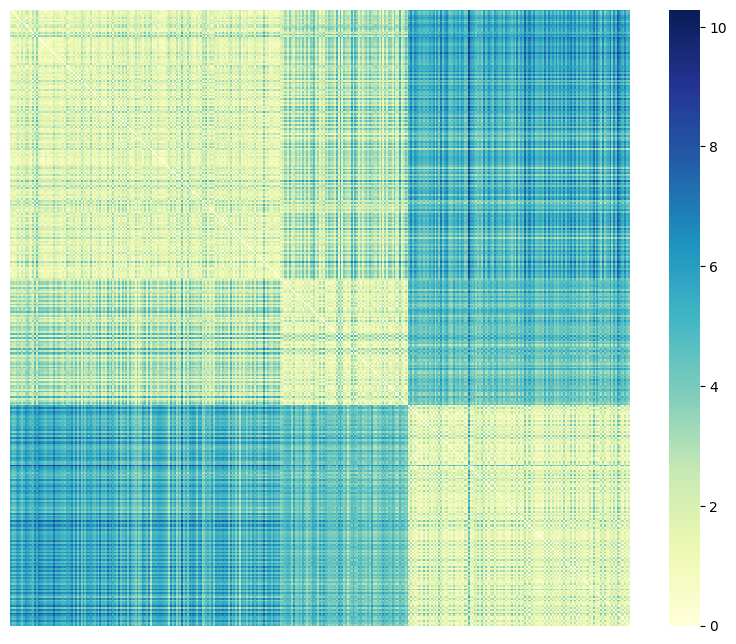

In [325]:
distance_matrix = distance.cdist(caracteristicas_estadarizadas,caracteristicas_estadarizadas, 'euclidean')

distance_df = pd.DataFrame(distance_matrix, index = caracteristicas_estadarizadas.index, columns = caracteristicas_estadarizadas.index)
plt.figure(figsize=(10,8))
sns.heatmap(distance_df, annot = False, cmap = "YlGnBu", fmt=".1f")
plt.xticks([])
plt.yticks([])
plt.show()

**Determinación del Número de Clústeres - Análisis Jerárquico: Utilizar métodos de clustering jerárquico para explorar la estrucutra de los datos. Aplicar técnicas como el dendograma para visualizar y determinar el número óptimo de clústeres. Aplicar los procedimientos que conozcas que sirvan para decidir el número de clústers. Discutir las decisiones tomadas en el proceso**

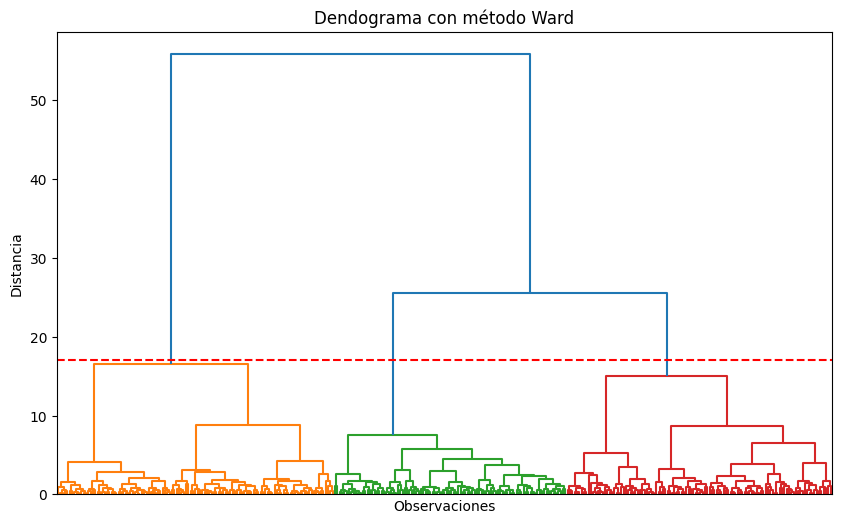

In [326]:
linkage_matrix = sch.linkage(caracteristicas_estadarizadas, method = 'ward')

#Creación del dendograma

plt.figure(figsize=(10,6))
dendograma = sch.dendrogram(linkage_matrix, labels = None, leaf_rotation = 90, color_threshold = 20)
plt.title("Dendograma con método Ward")
plt.xlabel("Observaciones")
plt.axhline(y = 17, color = 'r', linestyle='--')
plt.xticks([])
plt.ylabel("Distancia")
plt.show()

El dendograma muestra que 2 o tres clusters pueden ser buena opción. Nos proponemos explorar ambas opciones. Nos inclinamos más hacia 3 clústers. Tomaremos la decisión final al 

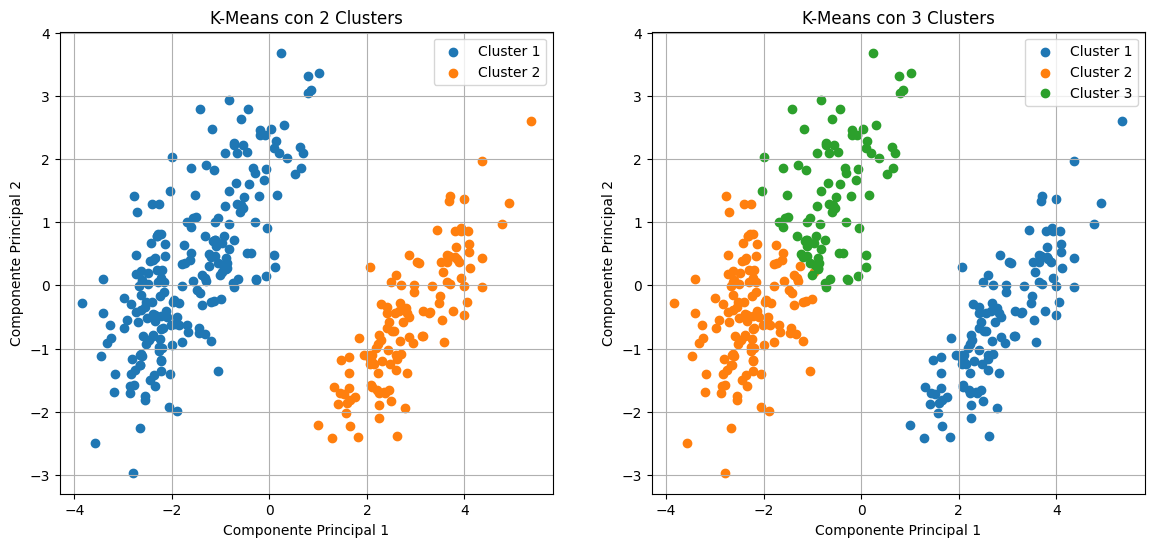

In [327]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(caracteristicas_estadarizadas)
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init=10).fit(caracteristicas_estadarizadas)

comp_principales = pca.fit_transform(caracteristicas_estadarizadas)

caracteristicas_estadarizadas['Cluster_KMeans_2'] = kmeans_2.labels_
caracteristicas_estadarizadas['Cluster_KMeans_3'] = kmeans_3.labels_

df_pca = pd.DataFrame(data=comp_principales, columns=['CP1', 'CP2'], index=df.index)

# Create subplots once
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2 Clusters
for cluster in np.unique(caracteristicas_estadarizadas['Cluster_KMeans_2']):
    cluster_indices = df_pca.loc[caracteristicas_estadarizadas['Cluster_KMeans_2'] == cluster].index
    axes[0].scatter(df_pca.loc[cluster_indices, 'CP1'],
                    df_pca.loc[cluster_indices, 'CP2'],
                    label=f'Cluster {cluster+1}')

axes[0].set_title("K-Means con 2 Clusters")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")
axes[0].legend()
axes[0].grid()

# 3 Clusters
for cluster in np.unique(caracteristicas_estadarizadas['Cluster_KMeans_3']):
    cluster_indices = df_pca.loc[caracteristicas_estadarizadas['Cluster_KMeans_3'] == cluster].index
    axes[1].scatter(df_pca.loc[cluster_indices, 'CP1'],
                    df_pca.loc[cluster_indices, 'CP2'],
                    label=f'Cluster {cluster+1}')

axes[1].set_title("K-Means con 3 Clusters")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")
axes[1].legend()
axes[1].grid()

plt.show()


Los gráficos muestran la agrupación con 2 y 3 clusters. Se observa que con 3 clusters, los datos parece dividirse mejor, lo que sugiere que usar 3 clusters es una mejor opción.

**4. Evaluación de la Calidad de las Agrupaciones: Evaluar la calidad de los clústeres formados utilizando el índice de silueta**

In [328]:
silhouette_2 = silhouette_score(caracteristicas_estadarizadas, caracteristicas_estadarizadas['Cluster_KMeans_2'])
silhouette_3 = silhouette_score(caracteristicas_estadarizadas, caracteristicas_estadarizadas['Cluster_KMeans_3'])

silhouette_2, silhouette_3

(np.float64(0.5843931946598983), np.float64(0.5172848615361674))

El índice de silueta para 2 clusters es 0.56, mientras que para 3 clusters es 0.58. Un valor más alto indica una mejor separación entre clusters, luego nuestro razonamiento anterior se ve justificado, 3 clústeres es el número óptimo.

**5.Representa los centroides de cada especie y cada isla en un gráfico que tenga como ejes las dos primeras componentes principales**

In [329]:
caracteristicas_estadarizadas_especies['island'] = df['island'].loc[caracteristicas_estadarizadas_especies.index].values

caracteristicas_estadarizadas

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,Cluster_KMeans_2,Cluster_KMeans_3
0,-0.896042,0.780732,-1.426752,-0.568475,-1.853593,0.032069,0,1
1,-0.822788,0.119584,-1.069474,-0.506286,-1.316254,-0.443527,0,1
2,-0.676280,0.424729,-0.426373,-1.190361,-1.376605,-0.161230,0,1
3,-1.335566,1.085877,-0.569284,-0.941606,-1.885288,-0.012351,0,1
4,-0.859415,1.747026,-0.783651,-0.692852,-1.919981,0.817598,0,1
...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,1.997716,-0.976771,1,0
329,0.514098,-1.457000,1.002739,0.799674,1.832651,-0.784510,1,0
330,1.173384,-0.744994,1.502928,1.919069,2.751505,0.266556,1,0
331,0.221082,-1.202712,0.788372,1.234995,1.713854,-0.725875,1,0


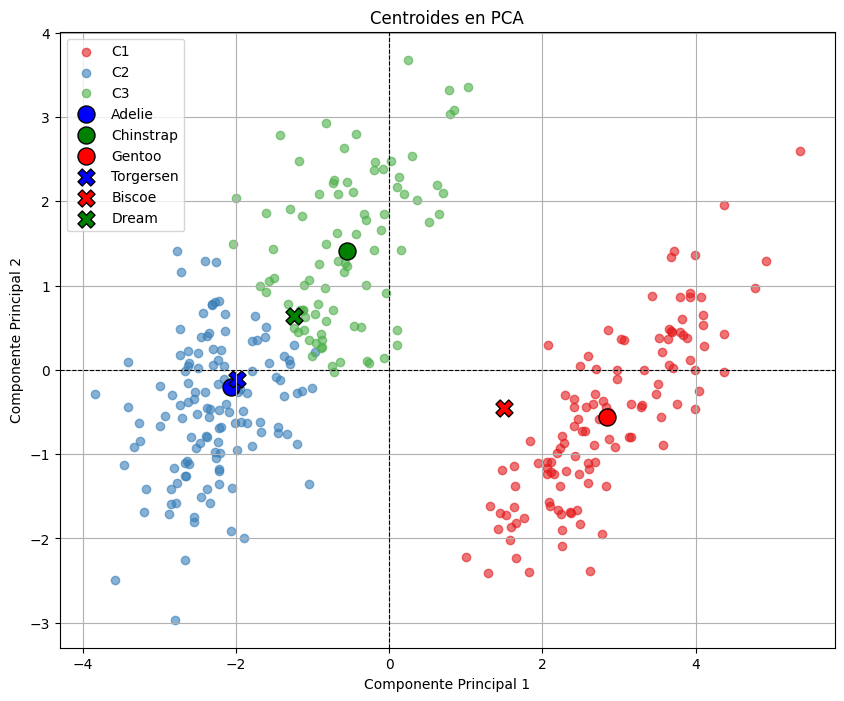

In [330]:
plt.figure(figsize=(10, 8))

# Obtener las categorías únicas
especies = caracteristicas_estadarizadas_especies['species'].unique()
islas = caracteristicas_estadarizadas_especies['island'].unique()

# Definir colores específicos para especies e islas
colores_definidos = {
    "Torgersen": "blue",
    "Adelie": "blue",
    "Dream": "green",
    "Gentoo": "red",
    "Biscoe": "red",
    "Chinstrap": "green"
}

# Asignar colores a cada especie e isla
colores_especies_dict = {especie: colores_definidos.get(especie, "gray") for especie in especies}
colores_islas_dict = {isla: colores_definidos.get(isla, "gray") for isla in islas}

# Asignar colores a los clusters
num_clusters = len(set(caracteristicas_estadarizadas['Cluster_KMeans_3']))
colores_clusters = sns.color_palette("Set1", num_clusters)

# Graficar todas las observaciones con colores según el cluster
for cluster in range(num_clusters):
    indices_cluster = caracteristicas_estadarizadas['Cluster_KMeans_3'] == cluster
    plt.scatter(comp_principales[indices_cluster, 0], 
                comp_principales[indices_cluster, 1], 
                color=colores_clusters[cluster], 
                alpha=0.6, 
                label=f"C{cluster+1}")

# Graficar centroides de especies
for especie in especies:
    centroide_especie = np.mean(comp_principales[caracteristicas_estadarizadas_especies['species'] == especie], axis=0)
    plt.scatter(centroide_especie[0], centroide_especie[1], color=colores_especies_dict[especie], marker="o", s=150, edgecolors="black", label=f"{especie}")

# Graficar centroides de islas con marcador 'X' y colores definidos
for isla in islas:
    centroide_isla = np.mean(comp_principales[caracteristicas_estadarizadas_especies['island'] == isla], axis=0)
    plt.scatter(centroide_isla[0], centroide_isla[1], color=colores_islas_dict[isla], marker="X", s=150, edgecolors="black", label=f"{isla}")

# Configuración del gráfico
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Centroides en PCA")
plt.legend()
plt.grid()
plt.show()


**6. Caracterización de los Clústeres: Caracterizar cada clúster basándose
en estadísticos descriptivos y comparar las propiedades distintivas entre
ellos.**

                 bill_length_mm_z                                          \
                            count      mean       std       min       25%   
Cluster_KMeans_3                                                            
0                           119.0  0.654758  0.568839 -0.566399  0.248552   
1                           126.0 -1.030922  0.464644 -2.177987 -1.372193   
2                            88.0  0.590682  0.774584 -0.877728 -0.145188   

                                               bill_depth_mm_z            ...  \
                       50%       75%       max           count      mean  ...   
Cluster_KMeans_3                                                          ...   
0                 0.623979  1.026876  2.858227           119.0 -1.102707  ...   
1                -1.060863 -0.726642  0.532412           126.0  0.442893  ...   
2                 0.532412  1.232903  2.565211            88.0  0.857018  ...   

                 flipper_length_mm_z           bod

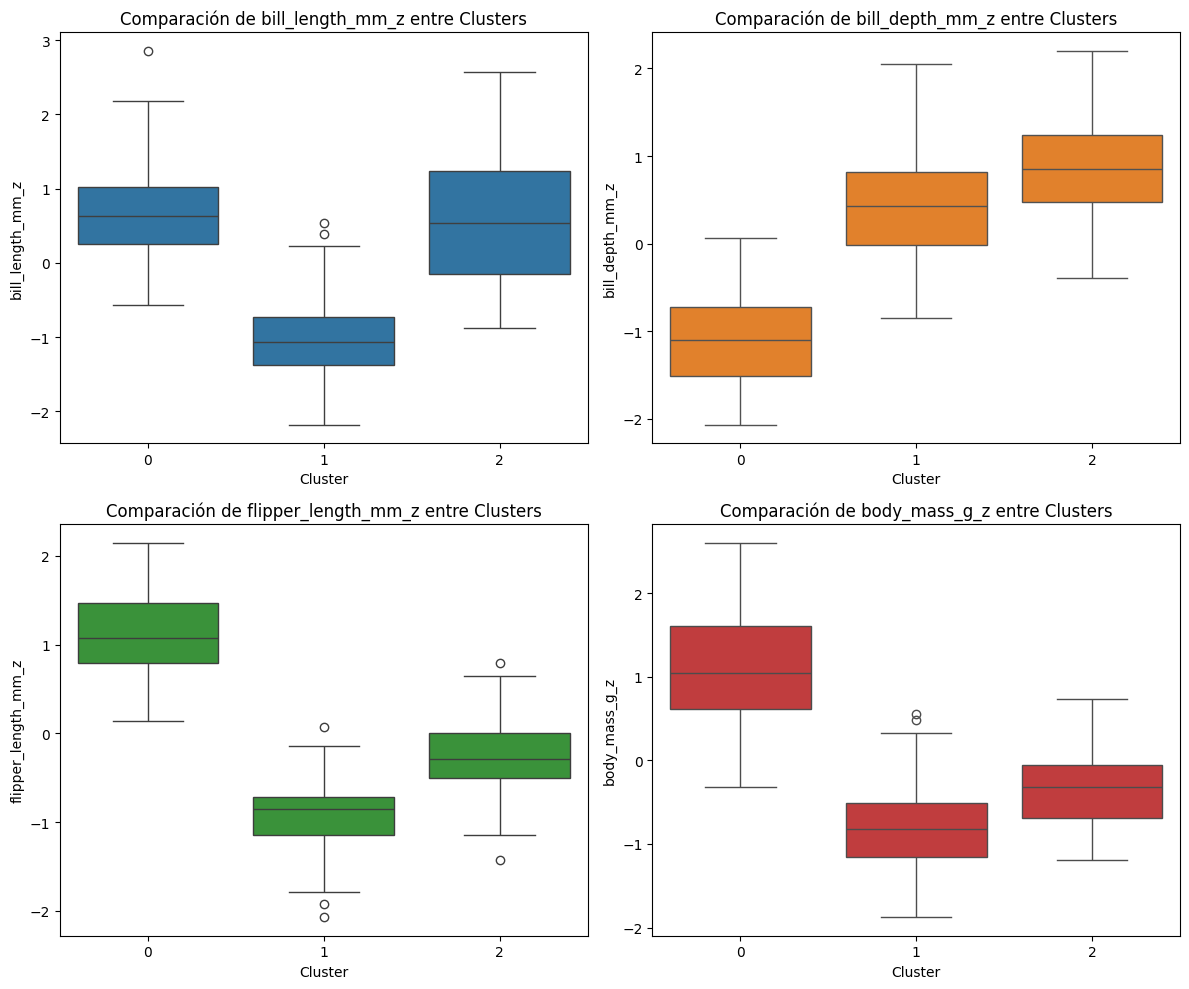

In [331]:

caracteristicas_estadarizadas.drop(['Cluster_KMeans_2', 'Componente 1', 'Componente 2'], axis=1, inplace=True)

estadisticos_por_cluster = caracteristicas_estadarizadas.groupby("Cluster_KMeans_3").describe()
print(estadisticos_por_cluster)

variables = ['bill_length_mm_z', 'bill_depth_mm_z', 'flipper_length_mm_z', 'body_mass_g_z']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  

# Hacemos un grid de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x="Cluster_KMeans_3", y=var, data=caracteristicas_estadarizadas, 
                ax=axes[i], color=colors[i])
    axes[i].set_title(f"Comparación de {var} entre Clusters")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

Como vimos antes, el Cluster 1 se relaciona con la especie Gentoo, el Cluster 2 con Adelie y el Cluster 3 con Chinstrap. Es de remarcar, que la especie Gentoo presenta un tamaño de aleta y una masa corporal mayor que las otras dos especies, mientras que la profunidad de su pico es la menor. La especie que presenta más variabilidad en cuanto a esta última característica es la Chinstrap, aunque su media casi coincide con la especie Gentoo. Refiérase al grádico para ver las diferentes diferencias entre cada variable para los distintos clusters